# Data Analysis in Geoscience Remote Sensing Projects: Exercises 
## Solutions to tasks: Intro and descriptive statistics
Hendrik Andersen | contact: hendrik.andersen@kit.edu

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import statsmodels.stats.api as sms
import pandas as pd
from scipy.stats import pearsonr
import scipy.stats

1.1 Create an array named 'arr_1d' that is a vector (1D) and consists of 1000 random numbers.

In [3]:
arr_1d = np.random.rand(1000)
print(arr_1d.shape)

(1000,)


1.2 Reshape 'arr_1d' so that it has the shape (100,10) and save it in an array named 'arr_2d'

In [4]:
arr_2d = arr_1d.reshape(100,10)
print(arr_2d.shape)

(100, 10)


1.3 Reshape 'arr_1d' so that it has the shape (10,10,10) and save it in an array named 'arr_3d'

In [5]:
arr_3d = arr_1d.reshape(10,10,10)
print(arr_3d.shape)

(10, 10, 10)


1.4 Find out using the help of np.random: What kind of distribution underlies arrays a_4 and a_5?

__Solution__: The help of numpy.random.randn (https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html) tells us that the generated data for a_4 follows a uniform distribution, while a_5 follows a standard normal distribution (https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)

1.5 Find out using the help of np.random: What is the correct function to generate random data of a “discrete uniform” distribution?

__Solution__: Checking the documents for numpy.random gives us the function numpy.random.uniform() for a discrete uniform distribution over a user defined intervall (https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html). However, the function numpy.random.rand from the task above also returns a uniform distribution but with a pre-defined intervall. Depending on the task, one has to decide on the function to use.

1.6 Generate a scatter plot of a_4 and a_5. Check out the help and try to find a way that visually accounts for the overlapping of points (there are multiple ways to do this).

__Solution__: 2 ways to do this are illustrated in the following.
1. To account for overlapping points, one can illustrate individual data points in a transparent way
2. A second way to account for overlapping points is to show the data as a two-dimensional histogram with color denoting the number of samples/pixel

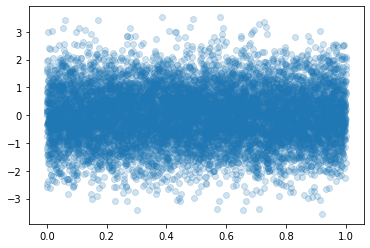

In [5]:
a_4 = np.random.rand(10000)
a_5 = np.random.randn(10000)
plt.scatter(a_4,a_5, alpha = 0.2)

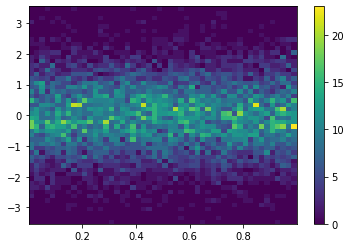

In [6]:
plt.hist2d(a_4,a_5, (50, 50)) 
plt.colorbar()

Change the look of the plots (search the official help of the function or search online for help):

1.7 Use a different colormap for the imshow figure and set its colorbar range to 0.2-0.8.

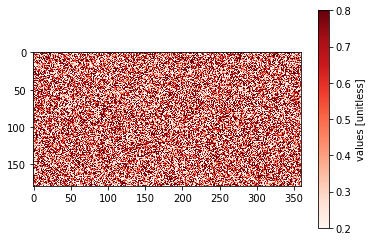

In [7]:
a_map = np.random.rand(180,360)
plt.imshow(a_map, cmap = plt.cm.Reds, vmin = 0.2, vmax =0.8) 
plt.colorbar(label='values [unitless]')
plt.show()

1.8 Change the color, linewidth and linestyle of a line plot.

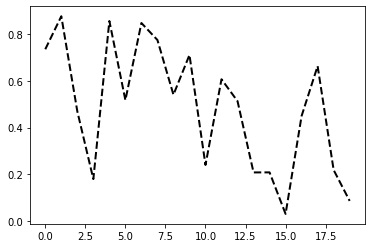

In [8]:
plt.plot(np.random.rand(20), color = 'k', linewidth = 2, linestyle = '--')

1.9 Create a title and label the x and y axes of one figure. 

Text(0, 0.5, 'y axis')

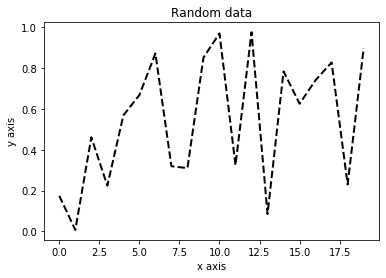

In [9]:
plt.plot(np.random.rand(20), color = 'k', linewidth = 2, linestyle = '--')
plt.title('Random data')
plt.xlabel('x axis')
plt.ylabel('y axis')

2.1 Compute the average, median, standard deviation, minimum, maximum, the interquartile range and the 5th and 95th percentile

In [10]:
a = np.random.randn(1000)

average = np.mean(a)
median = np.median(a)
standard_deviation = np.std(a)
minimum = np.min(a)
maximum = np.max(a) 
percentile5 = np.percentile(a,5)
percentile95 = np.percentile(a,95)
q75, q25 = np.percentile(a, [75 ,25])
interquartile_range = q75 - q25 # the interquartile range describes the difference between the 25th and 75 percentile. You can calculate this directly in numpy
# ... or use a direct implementation, e.g. from scipy.stats
interquartile_range_scipy = scipy.stats.iqr(a)

2.2 What is the difference between mean and median and when would you apply each?

__Solution__: The mean is the arithmetic mean of a sample and is sensitive to extreme values. The median is the central value of a sample sorted increasingly. It is robust in cases where extreme values occur.

2.3 Compute the Shapiro-Wilks test from scipy.stats to test for normality of the distribution

In [11]:
scipy.stats.shapiro(a)

(0.9987257122993469, 0.7058202028274536)

2.4 Plot the average number of cyclists over the course of a week (monday, tuesday, ...). Tipp: Use groupby

In [9]:
df = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
df = df.rename(columns={"Fremont Bridge Total": "total", 
                        "Fremont Bridge East Sidewalk": "east",
                        "Fremont Bridge West Sidewalk": "west"}) 

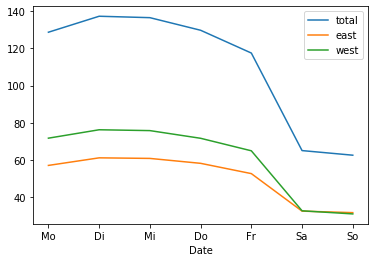

In [11]:
df.groupby(df.index.dayofweek).mean().plot()
_ = plt.xticks(ticks=[0,1,2,3,4,5,6],labels=["Mo","Di","Mi","Do","Fr","Sa","So"])

2.5 Plot a 12-month rolling average 

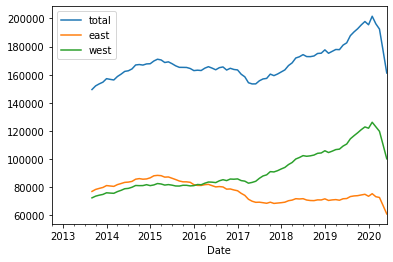

In [14]:
df.resample('m').sum().rolling(12).mean().plot()

2.6 How many cyclists (total) have passed the bridge in January 2015?

In [15]:
df['total'].loc['2015-01'].sum()

121260.0

2.7 Compute the correlations at different temporal resolutions (daily, weekly, monthly). Tip: Use resample() or groupby()\

In [16]:
X_daily = df['east'].resample('d').mean()
y_daily = df['west'].resample('d').mean() 
X_weekly = df['east'].resample('w').mean()
y_weekly = df['west'].resample('w').mean() 
X_monthly = df['east'].resample('m').mean()
y_monthly = df['west'].resample('m').mean() 

r_daily, p_daily = pearsonr(X_daily,y_daily)
r_weekly, p_weekly = pearsonr(X_weekly,y_weekly)
r_monthly, p_monthly = pearsonr(X_monthly,y_monthly)

print(r_daily, r_weekly, r_monthly)

0.8429020176917259 0.7806002975006833 0.7638551393690851


2.8 Compute a linear regression between east and west for the monthly means.
Compute the correlations at different temporal resolutions (daily, weekly, monthly).

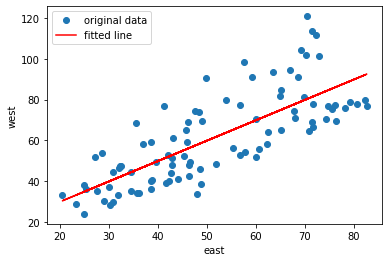

In [17]:
X = df['east'].resample('m').mean()
y = df['west'].resample('m').mean()
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X,y)

plt.plot(X,y, 'o', label='original data')
plt.plot(X, intercept + slope*X, 'r', label='fitted line')
plt.xlabel('east')
plt.ylabel('west')
plt.legend()
plt.show()

2.9 Describe in one sentence: How do you interpret the slope of a linear relationship? 

__Solution__: The slope can be interpreted as the sensitivity of y to a change in X. (of course your specific sentence may vary :D)

2.10 What is the prediction of the regression model for 'west', if 'east'=45 (daily resolution)

In [18]:
intercept + slope*45

54.81889663655669

2.11 Check out the help of stats.ttest_ind: What exactly do the test results mean, and are the differences between X and y significant at the 0.05 level?

In [15]:
# yes, the two samples differ significantly (p<0.05) 
t,p=scipy.stats.ttest_ind(X,y)
p<0.05

True